## Assignment

Use the Titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic/data)

1️⃣ Explore the dataset

* Summarize numeric and categorical columns

* Identify missing values and unusual data types

* Visualize distributions for numeric features

2️⃣ Handle missing values

* Decide how to treat missing values for each column

* Justify your approach (mean, median, mode, drop, or another method)

* Compare the dataset before and after imputation

3️⃣ Detect and handle outliers

* Identify outliers in at least two numeric columns using any method(s) you choose

* Decide whether to remove, cap, or transform outliers, and justify your choice

* Visualize the results

4️⃣ Encode categorical variables

* Decide which columns are nominal vs. ordinal

* Apply appropriate encoding (One-Hot, Label, or another)

* Explain why you chose this method

5️⃣ Scale numeric features

* Apply scaling to at least two numeric columns

* Show before-and-after distributions and discuss how scaling affects the data

6️⃣ Feature engineering

* Create at least one new feature derived from existing data

* Explain why this feature could be informative for modeling

7️⃣ Feature selection / importance

* Analyze correlations or other relationships between features and the target

* Identify redundant or less informative features

* Explain your reasoning

8️⃣ Train-Test Split & Data Leakage Awareness

* Split the data into training and test sets

* Explain how you avoided data leakage

9️⃣ Pipeline

* Create a pipeline that combines at least three preprocessing steps

* Ensure it can be applied to new/unseen data without modifications

## Read the dataset

In [2]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Read the csv dataset
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1️⃣ Explore the dataset

### Check what columns have null values

In [4]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- We see there are 3 columns that have null values: Age, Cabin and Embarked.

### Summarize numeric and categorical columns

In [5]:
# Numeric columns
print("Numeric Columns:")
df.describe()

Numeric Columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Categorical columns
print("Categorical Columns:")
df.describe(include='object')

Categorical Columns:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


### Visualize the distribution for numeric features

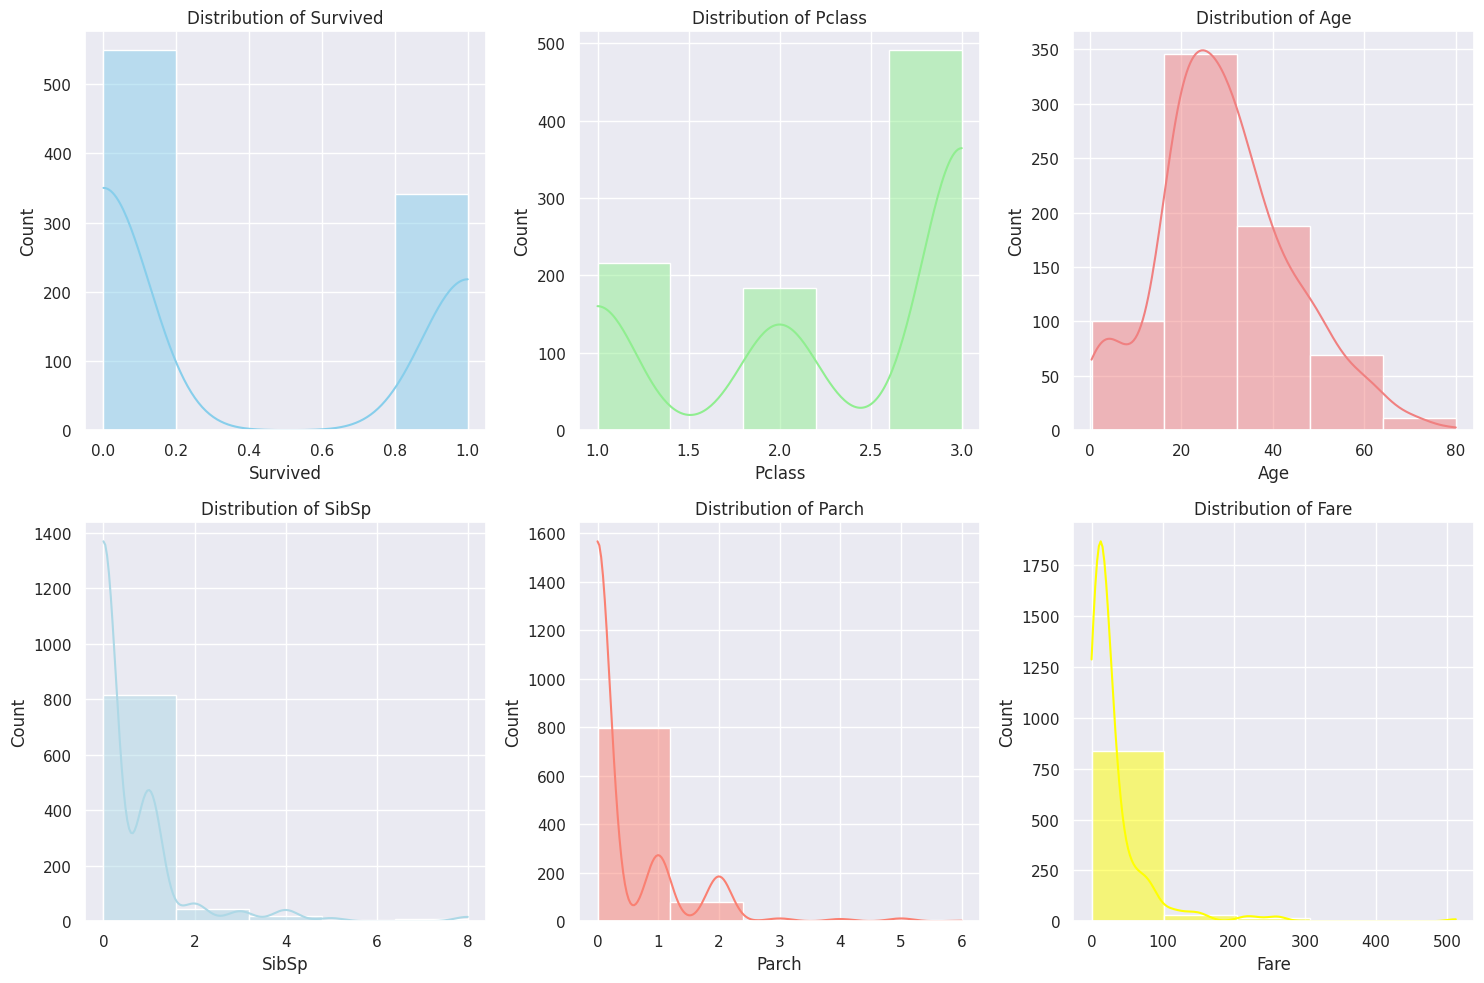

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df['Survived'], bins=5, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of Survived")

sns.histplot(df['Pclass'], bins=5, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Distribution of Pclass")

sns.histplot(df['Age'], bins=5, kde=True, ax=axes[0, 2], color='lightcoral')
axes[0, 2].set_title("Distribution of Age")

sns.histplot(df['SibSp'], bins=5, kde=True, ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title("Distribution of SibSp")

sns.histplot(df['Parch'], bins=5, kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Distribution of Parch")

sns.histplot(df['Fare'], bins=5, kde=True, ax=axes[1, 2], color='yellow')
axes[1, 2].set_title("Distribution of Fare")

plt.tight_layout()
plt.show()

From the distribution of each numeric feature we found out that:
- *Survived:* There are more people who didn't survive that people that did
- *Pclass:* The majority of passengers were in Pclass 3, followed by Pclass 1, and then Pclass 2
- *Age:* Indicates a large number of younger passengers, with a peak in the late 20s and a small number of elderly passengers
- *SibSp:* Showes that most passengers traveled alone or with one sibling/spouse and very few passengers had a large number of siblings or spouses
- *Parch:* Similar to SibSp, it indicates that most passengers traveled without parents or children, or with only one or two
- *Fare:* Most passengers paid a lower fare, with a few passengers paying significantly higher fares (outliers)

## 2️⃣ Handle missing values

### Fill the null values of the numeric column 'Age'

- We want to check how many missing values are there in the numerical column *Age*

In [8]:
# Check missing values before filling
print("Missing values in 'Age' before filling:")
print(df['Age'].isna().sum())

Missing values in 'Age' before filling:
177


#### Create a new 'Title' column to get the average ages for each of the titles

- Instead of filling the missing values with mean, we decided to do a better prediction of those values. We want to fill them with the average age of each title group, extracted from passengers name.

- Define a function to extract the 'Title' of each passenger from the 'Name' column

In [9]:
import re

# Extract the title from the 'Name' column and apply it to create a new 'Title' column.
def extract_title(name):
    # Use a raw string for the regex pattern
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df['Title'] = df['Name'].apply(extract_title)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


- Calculate the mean 'Age' for each unique title group, ignoring the current missing 'Age' values.


In [10]:
# Calculate the mean 'Age' for each unique title group, ignoring the current missing 'Age' values.
mean_age_by_title = df.groupby('Title')['Age'].mean()
print("Mean Age by Title:")
print(mean_age_by_title)

Mean Age by Title:
Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64


#### Visualize the distribution of 'Age' in each title group

- Use a box plot to better visualise the distribution of ages within title groups

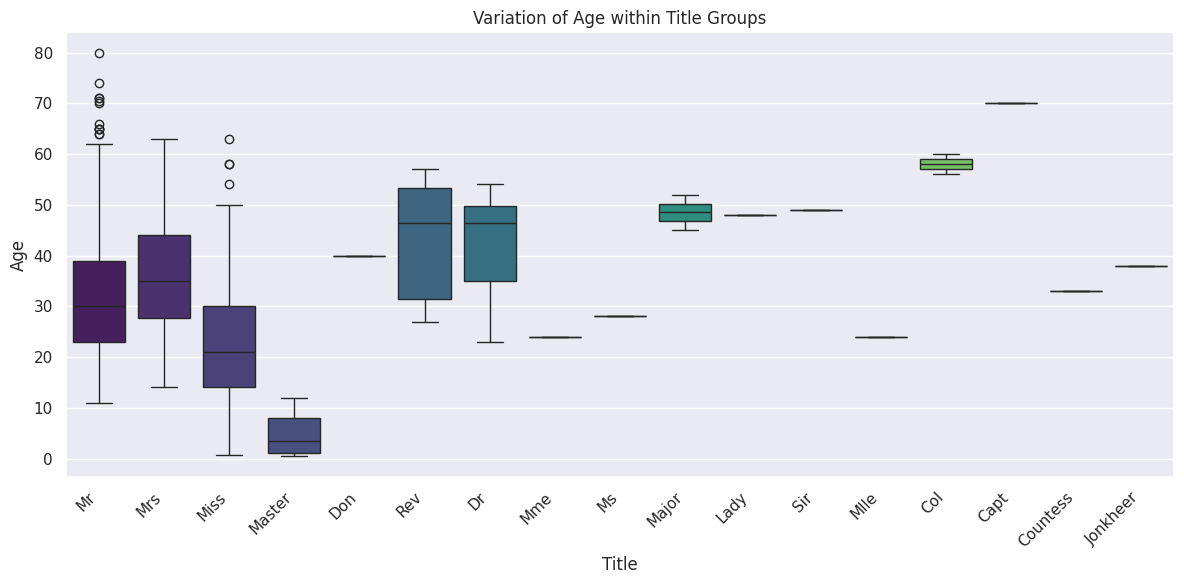

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Age', data=df, hue='Title', palette='viridis')
plt.title('Variation of Age within Title Groups')
plt.xlabel('Title')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

- For the rows where 'Age' is missing, fill the missing values with the calculated mean age for that row's title group.

#### Fill the missing 'Age' values with the average age by 'Title'

In [12]:
# Identify rows with missing 'Age'
missing_age_rows = df[df['Age'].isna()]

# Iterate through rows with missing age and fill with mean age by title
for index, row in missing_age_rows.iterrows():
    title = row['Title']
    if title in mean_age_by_title:
        df.loc[index, 'Age'] = mean_age_by_title[title]
    else:
        df.loc[index, 'Age'] = df['Age'].mean() # Fallback to overall mean

display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
# Check missing values after filling
print("Missing values in 'Age' after filling:")
print(df['Age'].isna().sum())

Missing values in 'Age' after filling:
0


### Fill the null values of the categorical column 'Cabin'

- The categorical column *Cabin* has too many null values to drop all the columns, so we should first see from which class are the passengers that don't have any cabin

- We create a bar plot to visualize the relationship between 'Pclass' and whether 'Cabin' information is missing.


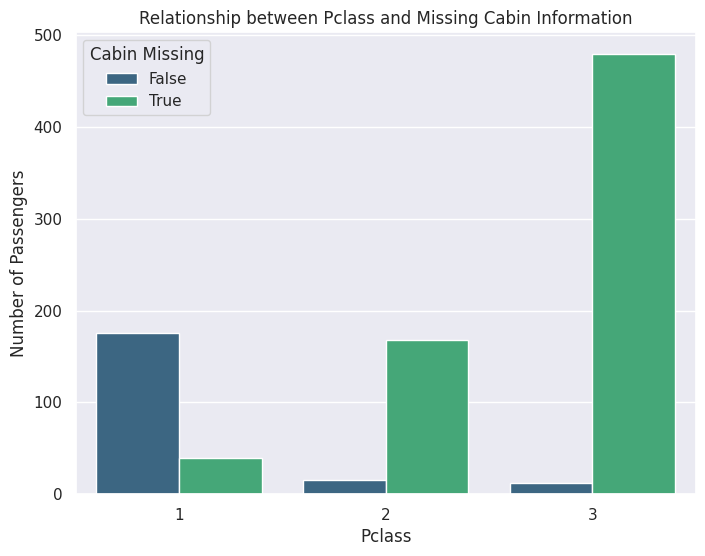

In [14]:
# Create a new column to indicate if the 'Cabin' value is missing
df['Cabin_Missing'] = df['Cabin'].isna()

# Create a countplot to show the relationship between Pclass and Cabin_Missing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Cabin_Missing', palette='viridis')
plt.title('Relationship between Pclass and Missing Cabin Information')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Cabin Missing')
plt.show()

# Drop the temporary 'Cabin_Missing' column
df = df.drop('Cabin_Missing', axis=1)

- From the plot we observe that the big majority of passengers from classes 2 and 3 don't have an assigned cabin.


- The best method to handle the missing values for the 'Cabin' column would be to fill those fields with the 'Unknown' keyword. In this way, we preserve the assigned cabins and make sure to take into account in the future the people who were not assigned a cabin.

In [15]:
# Check missing values before filling
print("Missing values in 'Cabin' before filling:")
print(df['Cabin'].isna().sum())

Missing values in 'Cabin' before filling:
687


In [16]:
# Fill missing values in Cabin with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [17]:
# Check missing values after filling
print("Missing values in 'Cabin' after filling:")
print(df['Cabin'].isna().sum())

Missing values in 'Cabin' after filling:
0


### Fill the null values of the categorical column 'Embarked'

-  There are only 2 null values in the categorical column 'Embarked' and we decide to fill them with the most popular value using the mode function

In [18]:
# Check missing values before dropping
print("Missing values in 'Embarked' before filling:")
print(df['Embarked'].isna().sum())

Missing values in 'Embarked' before filling:
2


In [19]:
# Fill missing values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [20]:
# Check missing values after dropping
print("Missing values in 'Embarked' after dropping:")
print(df['Embarked'].isna().sum())

Missing values in 'Embarked' after dropping:
0


### Check to see if all null values were handled

In [21]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- Now we see that there are no columns with null values left

## 3️⃣ Detect and handle outliers

- Out of the 7 numerical columns *(PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare)* we will not check for outliers in *PassengerId*, because each value is unique, the *Survived* column only has binary values and *Pclass* holds only values from the set (1, 2, 3).
- We decide to check for outliers in these 4 columns: *Age, SibSp, Parch and Fare*

### Check for outliers in the 'Age' column

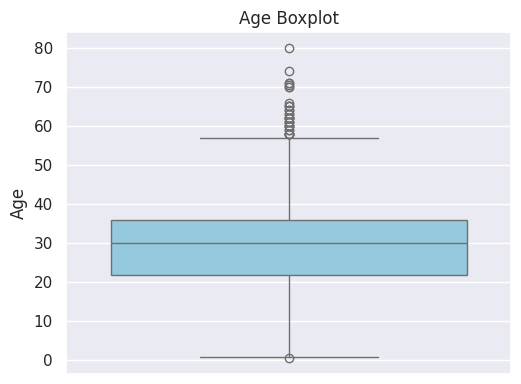

In [22]:
# Use a boxplot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'], color="skyblue")
plt.title("Age Boxplot")
plt.tight_layout()
plt.show()

- We can see from the plot that the median age is around 28-30 years and the majority of ages fall within the blue box. The outliers are passangers very young (0-2 years) and the passangers which are older than 54 years.

- Detect the outliers also using IQR

In [23]:
# Detect outliers using IQR
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

In [24]:
# See the outliers
outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,Miss
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,Unknown,S,Mr
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C,Mr
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,Unknown,S,Mr
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C,Mr
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Unknown,Q,Mr
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S,Mr
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C,Miss
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.00,0,0,237442,13.5000,Unknown,S,Mr
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S,Mr


- We decide to keep the outliers because there are no values in the 'Age' column that would not correspond to an actual age

### Check for outliers in the 'SibSp' column

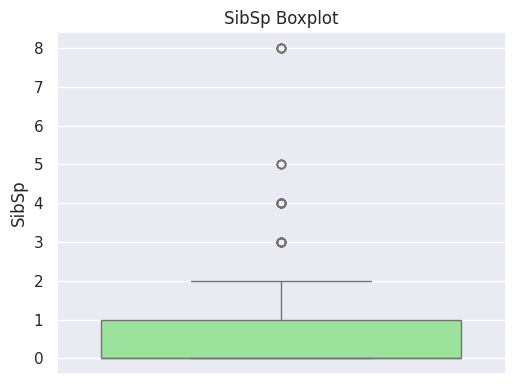

In [25]:
# Use a boxplot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['SibSp'], color="lightgreen")
plt.title("SibSp Boxplot")
plt.tight_layout()
plt.show()

- From the plot we can see that most passangers travelled alone or with one member of their family. The outliers are passangers which travelled with more than 2 siblings or spouses.

### Check for outliers in the 'Parch' column

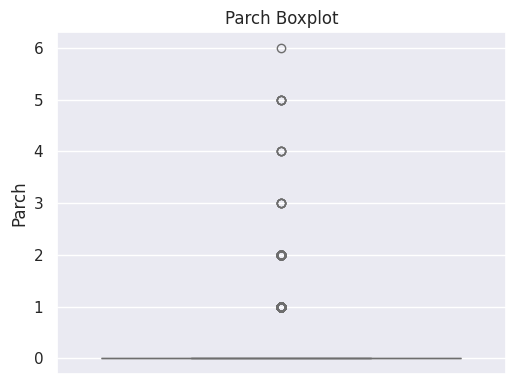

In [26]:
# Use a boxplot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Parch'], color="lightcoral")
plt.title("Parch Boxplot")
plt.tight_layout()
plt.show()

- From the plot we observe that most people travelled without a parent or children, similar to siblings and spouses. The values above 2 seem to be outliers, as the dots of the values 1 and 2 are darker coloured, meaning there are more passangers that travelled with 1 or 2 parents/children than more than 2.

### Check for outliers in the 'Fare' column

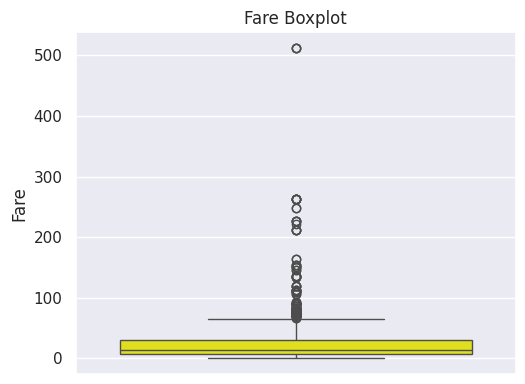

In [27]:
# Use a boxplot
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Fare'], color="yellow")
plt.title("Fare Boxplot")
plt.tight_layout()
plt.show()

- We see from the plot that most people travelled with a low fare and there are less and less people that paid a larger fare.

#### Apply a transformation to the 'Fare' column

- We decide to apply a logaritmic transformation to the values in the 'Fare' column to reduce the impact of outliers.
- We use *log1p* function to normalize the plot and to handle the posibillity of 0 values

In [28]:
# Apply a logarithmic transformation to the 'Fare' column using np.log1p
df['Fare'] = np.log1p(df['Fare'])

#### Visualize the results

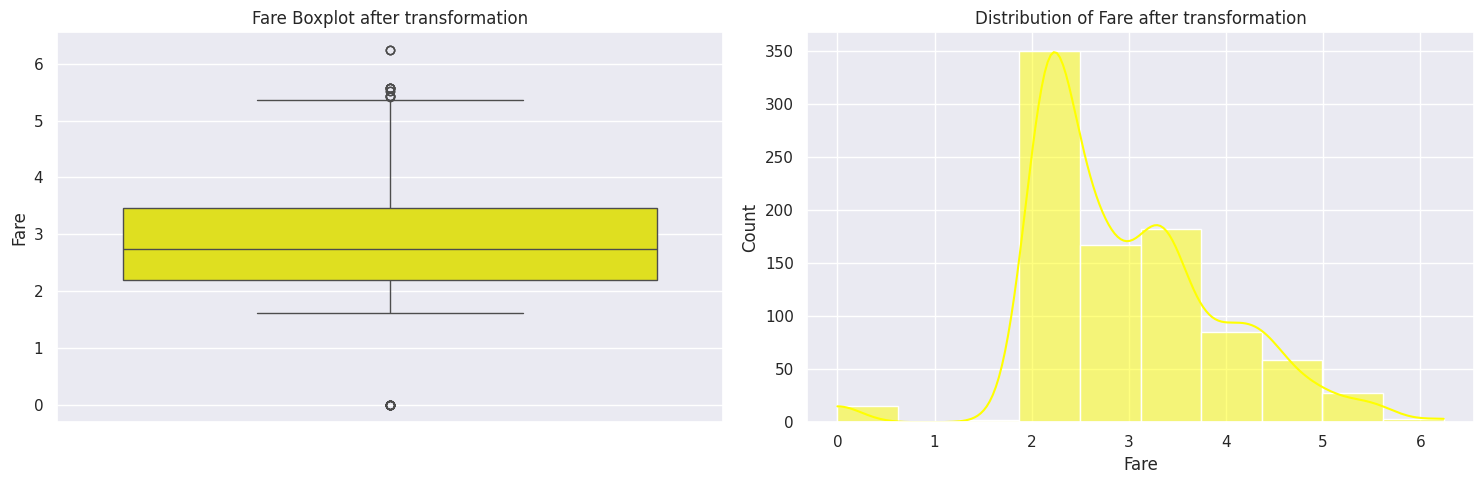

In [29]:
# Use a boxplot and a histplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(y=df['Fare'], ax=axes[0], color="yellow")
axes[0].set_title("Fare Boxplot after transformation")

sns.histplot(df['Fare'], bins=10, kde=True, ax=axes[1], color="yellow")
axes[1].set_title("Distribution of Fare after transformation")

plt.tight_layout()
plt.show()

## 4️⃣ Encode categorical variables


- We need to encode the categorical columns *Cabin*, *Sex*, *Ticket*, and *Embarked*.

### Check the values of the columns

- Examine the unique values and nature of 'Cabin', 'Sex', 'Ticket', and 'Embarked' to determine if they are nominal or ordinal.

In [30]:
# Print the number of unique values for each of the columns
print("Number of unique values:")
print("Cabin:", df['Cabin'].nunique())
print("Sex:", df['Sex'].nunique())
print("Ticket:", df['Ticket'].nunique())
print("Embarked:", df['Embarked'].nunique())

# Print the first 10 unique values for each the columns
print("\nFirst 10 unique values:")
print("Cabin:", df['Cabin'].unique()[:10])
print("Sex:", df['Sex'].unique()[:10])
print("Ticket:", df['Ticket'].unique()[:10])
print("Embarked:", df['Embarked'].unique()[:10])

Number of unique values:
Cabin: 148
Sex: 2
Ticket: 681
Embarked: 3

First 10 unique values:
Cabin: ['Unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78']
Sex: ['male' 'female']
Ticket: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']
Embarked: ['S' 'C' 'Q']


### Encode 'Sex' using One-Hot Encoding


- We decide to use One-Hot Encoding for *Sex* because it has only two possible values: male/female, so it is a nominal encoding variable.

In [31]:
# One-Hot Encoding for 'Sex'
df = pd.get_dummies(df, columns=['Sex'], dtype=int)
print("After One-Hot Encoding 'Sex':")
print(df.head())

After One-Hot Encoding 'Sex':
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket      Fare    Cabin Embarked Title  Sex_female  Sex_male  
0         A/5 21171  2.110213  Unknown        S    Mr           0         1  
1          PC 17599  4.280593      C85        C   Mrs           1         0  
2  STON/O2. 3101282  2.188856  Unknown        S  Miss         

### Encode 'Embarked' using One-Hot Encoding


- The 'Embarked' column has a small number of unique values (C, Q, S). Since there is no inherent order between these values, it is a nominal categorical variable, so we use One-Hot Encoding.

In [32]:
# One-Hot Encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', dtype=int)
print("After One-Hot Encoding 'Embarked':")
print(df.head())

After One-Hot Encoding 'Embarked':
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket      Fare    Cabin Title  Sex_female  Sex_male  \
0         A/5 21171  2.110213  Unknown    Mr           0         1   
1          PC 17599  4.280593      C85   Mrs           1         0   
2  STON/O2. 3101282  2.188856  Unknown  Miss           1         0   
3          

## 5️⃣ Scale numeric features


### Select the numeric columns to scale


In [33]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Title           object
Sex_female       int64
Sex_male         int64
Embarked_C       int64
Embarked_Q       int64
Embarked_S       int64
dtype: object


- We decide to scale these numeric columns: *'Age', 'SibSp', 'Parch', 'Fare'*


### Apply Scaling



- We will apply StandardScaler to the selected numeric columns: 'Age', 'SibSp', 'Parch', and 'Fare'.
- We decide to use these StandardScaler so we can bring all values centered to 0

In [34]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a copy of the dataframe
df_scaled = df.copy()

# Apply the scaler to the selected columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

print("DataFrame after scaling:")
display(df_scaled.head())

DataFrame after scaling:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.584387,0.432793,-0.473674,A/5 21171,-0.879741,Unknown,Mr,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.621365,0.432793,-0.473674,PC 17599,1.361220,C85,Mrs,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.282949,-0.474545,-0.473674,STON/O2. 3101282,-0.798540,Unknown,Miss,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.395286,0.432793,-0.473674,113803,1.062038,C123,Mrs,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0.395286,-0.474545,-0.473674,373450,-0.784179,Unknown,Mr,0,1,0,0,1


### Visualize Before and After Distributions



- Visualize the distributions of the scaled columns and compare them to the original distributions to see the effect of scaling.

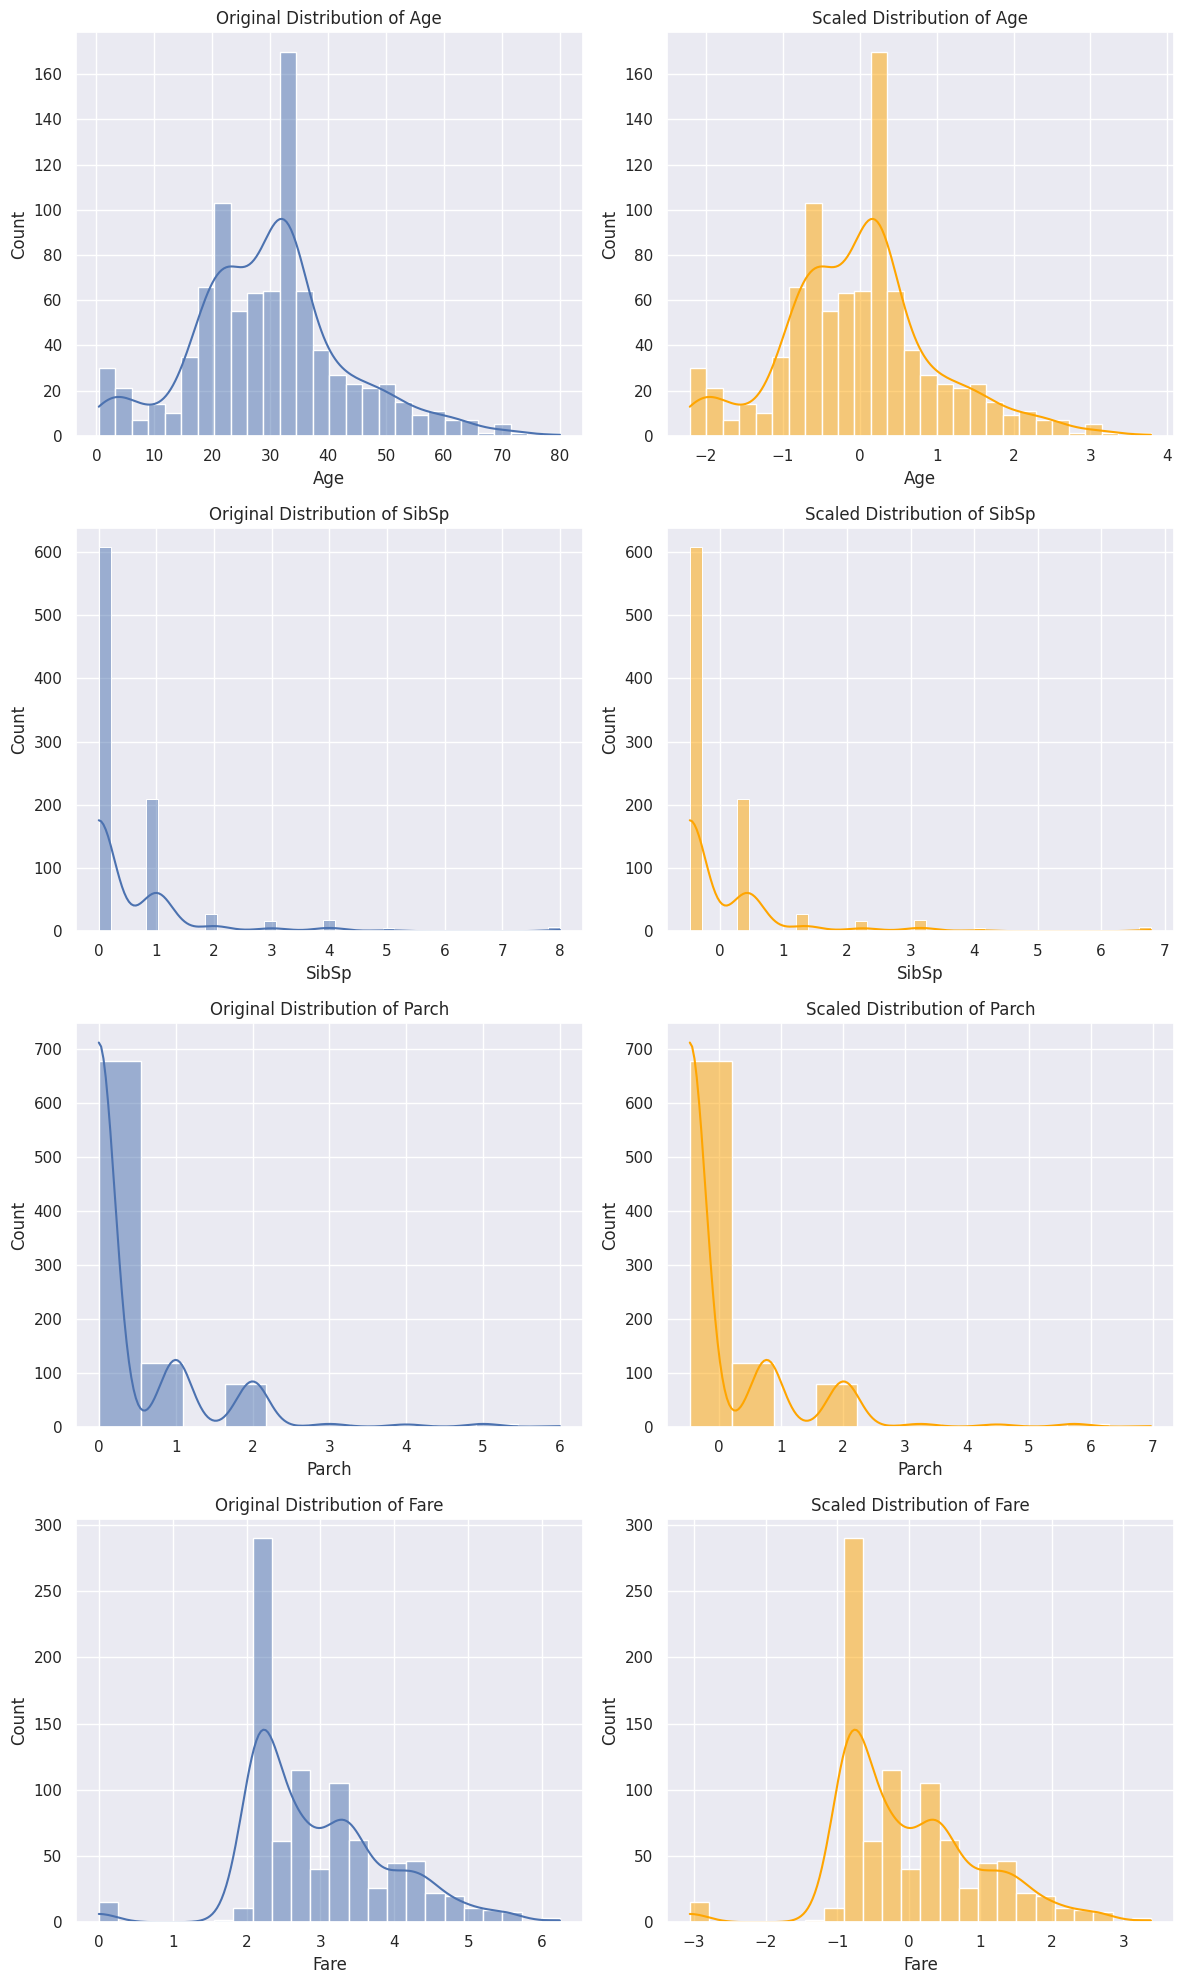

In [35]:
fig, axes = plt.subplots(len(columns_to_scale), 2, figsize=(12, 5 * len(columns_to_scale)))

for i, col in enumerate(columns_to_scale):
    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original Distribution of {col}")

    # Scaled distribution
    sns.histplot(df_scaled[col], kde=True, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f"Scaled Distribution of {col}")

plt.tight_layout()
plt.show()

## 6️⃣ Feature engineering


To perform feature engineering on the dataset to create new features that could be informative for predicting survival we decide to create these new features:
- Create a *'FamilySize'* feature from 'SibSp' and 'Parch'
- Create an *'IsAlone'* feature from 'FamilySize'
- Extract and encode a *'Title'* feature from the 'Name' column
- Extract and encode a *'CabinDeck'* feature from the 'Cabin' column
- Extract and encode a *'TicketPrefix'* from the 'Ticket' column

### Create the 'FamilySize' feature



- Combine 'SibSp' and 'Parch' to create a 'FamilySize' feature. This could be informative as passengers travelling with family might have different survival rates than those travelling alone.

In [36]:
# Create the 'FamilySize' feature by adding 'SibSp' and 'Parch' and then adding 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,Mr,0,1,0,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,Mrs,1,0,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,Miss,1,0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,Mrs,1,0,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,Mr,0,1,0,0,1,1


### Create the 'IsAlone' feature




- We want to derive an 'IsAlone' feature from 'FamilySize', because being alone or with family might impact survival.

In [37]:
# Create 'IsAlone' feature: 1 if FamilySize is 1, 0 otherwise
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
display(df.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,Mr,0,1,0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,Mrs,1,0,1,0,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,Miss,1,0,0,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,Mrs,1,0,0,0,1,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,Mr,0,1,0,0,1,1,1


In [38]:
# Check how many passangers are travelling alone
df['IsAlone'].value_counts()

,count
IsAlone,
1,537
0,354


### Extract titles from 'Name' column




 We want to extract the title (Mr., Mrs., Miss, Master) from the 'Name' column and see what impact it has on the survival rate. We already have the 'Title' column as we used it for filling in the missing 'Age' values.

- Now we want to examine the unique values in the 'Title' column and group less frequent titles so we can properly encode this column.
- Get the value counts for the 'Title' column and identify and replace infrequent titles with 'Rare', then display the updated value counts.


In [39]:
# Get value counts for 'Title'
title_counts = df['Title'].value_counts()
print("Original Title counts:")
print(title_counts)

# Define a mapping for titles based on common groupings
title_mapping = {
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Don": "Rare", "Capt": "Rare", "Jonkheer": "Rare",
    "Sir": "Mr",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Miss",
    "Lady": "Mrs",
    "Countess": "Mrs",
    "Major": "Mr"
}

# Apply the mapping to the 'Title' column
df['Title'] = df['Title'].map(title_mapping)

# Display value counts after grouping
print("\nTitle counts after grouping:")
print(df['Title'].value_counts())

Original Title counts:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Title counts after grouping:
Title
Mr        520
Miss      185
Mrs       128
Master     40
Rare       18
Name: count, dtype: int64


- Now we need to encode the 'Title' column using One-Hot Encoding

In [40]:
# Examine unique values in 'Title'
print("Unique values in 'Title':")
print(df['Title'].unique())

# Apply One-Hot Encoding to the 'Title' column
df = pd.get_dummies(df, columns=['Title'], prefix='Title', dtype=int)

print("\nDataFrame after One-Hot Encoding 'Title':")
display(df.head())

Unique values in 'Title':
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']

DataFrame after One-Hot Encoding 'Title':


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,...,0,0,1,2,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,...,1,0,0,2,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,...,0,0,1,1,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,...,0,0,1,2,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,...,0,0,1,1,1,0,0,1,0,0


### Extract 'CabinDeck' from 'Cabin'

- The 'Cabin' column has a very high number of unique values, so we can extract the first letter of the cabin, which might indicate the cabin deck and could be a useful feature.
- The values which are labeled with 'Unknown' will have the first letter 'U', which is not a problem because there is no cabin that has a deck 'U'


In [41]:
# Extract the first letter of the Cabin
df['CabinDeck'] = df['Cabin'].apply(lambda x: str(x)[0])

# Check unique values in Cabin Deck
print("Unique values in 'CabinDeck':")
print(df['CabinDeck'].unique())

Unique values in 'CabinDeck':
['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,CabinDeck
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,...,0,1,2,0,0,0,1,0,0,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,...,0,0,2,0,0,0,0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,...,0,1,1,1,0,1,0,0,0,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,...,0,1,2,0,0,0,0,1,0,C
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,...,0,1,1,1,0,0,1,0,0,U


Now we need to arrange the 'CabinDeck' values before encoding:
- From lowest to highest deck: G, F, E, D, C, B, A
- The 'T' deck is separate and higher than A
- The 'U' category represents unknown or unassigned cabins, so no deck.

The final order should be: U, G, F, E, D, C, B, A, T

- Now we can encode the 'CabinDeck' column by mapping the letter to a numerical label

In [43]:
# Define the desired order of cabin decks
deck_order = ['U', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'T']

# Create a mapping from deck letter to numerical label based on the desired order
deck_mapping = {deck: i for i, deck in enumerate(deck_order)}

# Apply the mapping to the 'CabinDeck' column, overwriting the original values
df['CabinDeck'] = df['CabinDeck'].map(deck_mapping)

# Now, let's check the unique values in the modified 'CabinDeck' column
print("Unique Encoded Cabin Deck values:")
print(df['CabinDeck'].unique())

# Display the head of the DataFrame to show the modified 'CabinDeck' column
display(df.head())

Unique Encoded Cabin Deck values:
[0 5 3 1 4 7 6 2 8]


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,CabinDeck
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,...,0,1,2,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,...,0,0,2,0,0,0,0,1,0,5
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,...,0,1,1,1,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,...,0,1,2,0,0,0,0,1,0,5
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,...,0,1,1,1,0,0,1,0,0,0


### Extract 'TicketPrefix' from 'Ticket'



Similar to 'Cabin', the 'Ticket' column has a very high number of unique values, so we decide to extract the ticket prefix of each ticket and put it in a new column named 'TicketPrefix'

- To extract the ticket prefix from the 'Ticket' column we will assume the prefix is the part of the ticket string before the first digit or space.
- If there's no clear prefix, we will use a placeholder 'NoPrefix'.

In [44]:
# Function to extract ticket prefix
def extract_ticket_prefix(ticket):
    # Use a regular expression to find the prefix (non-digit, non-space characters at the beginning)
    prefix_search = re.search(r'[^0-9\s]+', str(ticket))
    if prefix_search:
        return prefix_search.group(0).replace('.', '').replace('/', '').strip() # Clean up some characters
    return 'NoPrefix' # Assign 'NoPrefix' if no clear prefix is found

In [45]:
# Apply the function to create the new 'TicketPrefix' column
df['TicketPrefix'] = df['Ticket'].apply(extract_ticket_prefix)

print("Unique values in 'TicketPrefix' before encoding:")
print(df['TicketPrefix'].unique())

print("\nDataFrame head with 'TicketPrefix':")
display(df.head())

Unique values in 'TicketPrefix' before encoding:
['A' 'PC' 'STONO' 'NoPrefix' 'PP' 'CA' 'SCParis' 'SCA' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'C' 'SCPARIS' 'SOP' 'Fa' 'LINE' 'FCC' 'SWPP' 'SCOW' 'PPP'
 'SC' 'SCAH' 'AS' 'SOPP' 'FC' 'SOTONO' 'CASOTON']

DataFrame head with 'TicketPrefix':


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_S,FamilySize,IsAlone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,CabinDeck,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,...,1,2,0,0,0,1,0,0,0,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,...,0,2,0,0,0,0,1,0,5,PC
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,...,1,1,1,0,1,0,0,0,0,STONO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,...,1,2,0,0,0,0,1,0,5,NoPrefix
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,...,1,1,1,0,0,1,0,0,0,NoPrefix


- There are quite a few unique values in the 'TicketPrefix' column which probably represent the destination and it may be correlated to the cabin of the passenger.
- To reduce the number of values we will try to group them a little.

In [46]:
# Get value counts for TicketPrefix
prefix_counts = df['TicketPrefix'].value_counts()
print("Original TicketPrefix counts:")
print(prefix_counts)

Original TicketPrefix counts:
TicketPrefix
NoPrefix    661
PC           60
CA           41
A            28
STONO        18
SOTONOQ      15
WC           10
SCPARIS       7
SOC           6
C             5
FCC           5
LINE          4
SCParis       4
SOPP          3
SCAH          3
WEP           3
PP            3
PPP           2
SOTONO        2
SWPP          2
SP            1
SCA           1
SCOW          1
SOP           1
Fa            1
AS            1
SC            1
FC            1
CASOTON       1
Name: count, dtype: int64


In [47]:
# Define a mapping for grouping ticket prefixes
# Group less frequent prefixes and similar ones
prefix_mapping = {
    'A': 'A',
    'PC': 'PC',
    'STONOQ': 'STONO',
    'NoPrefix': 'NoPrefix',
    'PP': 'PP',
    'CA': 'CA',
    'SCParis': 'SC',
    'SCA': 'SC',
    'SP': 'Rare',
    'SOC': 'SOC',
    'WC': 'WC',
    'SOTONOQ': 'SOTONO',
    'WEP': 'WEP',
    'C': 'C',
    'SCPARIS': 'SC',
    'SOP': 'SOP',
    'Fa': 'Rare',
    'LINE': 'Rare',
    'FCC': 'FCC',
    'SWPP': 'Rare',
    'SCOW': 'Rare',
    'PPP': 'Rare',
    'SC': 'SC',
    'SCAH': 'SC',
    'AS': 'A',
    'SOPP': 'SOP',
    'FC': 'FCC',
    'SOTONO': 'SOTONO',
    'CASOTON': 'Rare' # Group very rare ones into 'Rare'
}

In [48]:
# Apply mapping to the 'TicketPrefix' column
# Use .get(prefix, 'Rare') as a fallback for any prefixes not in the mapping
df['TicketPrefix'] = df['TicketPrefix'].apply(lambda prefix: prefix_mapping.get(prefix, 'Rare'))

print("\nTicketPrefix counts after grouping:")
print(df['TicketPrefix'].value_counts())


TicketPrefix counts after grouping:
TicketPrefix
NoPrefix    661
PC           60
CA           41
Rare         30
A            29
SOTONO       17
SC           16
WC           10
FCC           6
SOC           6
C             5
SOP           4
PP            3
WEP           3
Name: count, dtype: int64


- Now that we reduced the number of ticket prefixes we can encode them using One-Hot Encoding, because the values of 'TicketPrefix' are unordered so, therefore it is a nominal variable.

In [49]:
# Apply One-Hot Encoding to the 'TicketPrefix' column
df = pd.get_dummies(df, columns=['TicketPrefix'], prefix='TicketPrefix', dtype=int)

print("After 'TicketPrefix' One-Hot Encoding:")
display(df.head())

After 'TicketPrefix' One-Hot Encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,TicketPrefix_NoPrefix,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_Rare,TicketPrefix_SC,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOTONO,TicketPrefix_WC,TicketPrefix_WEP
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,C85,...,0,1,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,Unknown,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,C123,...,1,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,Unknown,...,1,0,0,0,0,0,0,0,0,0


### Add the newly created columns to the scaled DataFrame

In [50]:
# Identify the newly created columns in df by comparing the columns in df to the original columns before feature engineering.
original_columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
new_columns = [col for col in df.columns if col not in original_columns]

# Add the new columns from df to df_scaled
for col in new_columns:
    df_scaled[col] = df[col]

print("DataFrame after adding new features to df_scaled:")
display(df_scaled.head())

DataFrame after adding new features to df_scaled:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,TicketPrefix_NoPrefix,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_Rare,TicketPrefix_SC,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOTONO,TicketPrefix_WC,TicketPrefix_WEP
0,1,0,3,"Braund, Mr. Owen Harris",-0.584387,0.432793,-0.473674,A/5 21171,-0.879741,Unknown,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.621365,0.432793,-0.473674,PC 17599,1.361220,C85,...,0,1,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.282949,-0.474545,-0.473674,STON/O2. 3101282,-0.798540,Unknown,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.395286,0.432793,-0.473674,113803,1.062038,C123,...,1,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0.395286,-0.474545,-0.473674,373450,-0.784179,Unknown,...,1,0,0,0,0,0,0,0,0,0


In [51]:
print(df_scaled.dtypes)

PassengerId                int64
Survived                   int64
Pclass                     int64
Name                      object
Age                      float64
SibSp                    float64
Parch                    float64
Ticket                    object
Fare                     float64
Cabin                     object
Title                     object
Sex_female                 int64
Sex_male                   int64
Embarked_C                 int64
Embarked_Q                 int64
Embarked_S                 int64
FamilySize                 int64
IsAlone                    int64
Title_Master               int64
Title_Miss                 int64
Title_Mr                   int64
Title_Mrs                  int64
Title_Rare                 int64
CabinDeck                  int64
TicketPrefix_A             int64
TicketPrefix_C             int64
TicketPrefix_CA            int64
TicketPrefix_FCC           int64
TicketPrefix_NoPrefix      int64
TicketPrefix_PC            int64
TicketPref

## 7️⃣ Feature selection / importance

Methods:

Filter methods: Select features based on statistics (e.g., correlation, chi-square)

Wrapper methods: Use models to evaluate subsets of features (e.g., recursive feature elimination)

Embedded methods: Algorithms that select features automatically (e.g., Lasso regression, decision trees)

### Feature Selection by Feature Scores

We want to perform feature selection using a statistical method to understand which features are most relevant for predicting whether a passenger survived .

- We set up a `SelectKBest` object. This is a tool from the scikit-learn library for selecting features based on their scores.
- Then we use `f_classif` scoring function to measure the score between a feature and *'Survived'*

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Separate features (X) and target (y)
# Exclude PassengerId and Survived
X = df_scaled.select_dtypes(include=np.number).drop(['PassengerId', 'Survived'], axis=1)
y = df_scaled['Survived']

# Initialize SelectKBest with f_classif as the scoring function and k='all' to get scores for all features
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to your data
selector.fit(X, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a pandas Series to easily view feature scores with their names
feature_scores_series = pd.Series(feature_scores, index=X.columns)

# Sort the features by their scores in descending order
sorted_feature_scores = feature_scores_series.sort_values(ascending=False)

print("Feature Relevance to Survived (using f_classif):")
print(sorted_feature_scores)

Feature Relevance to Survived (using f_classif):
Title_Mr                 377.295679
Sex_female               372.405724
Sex_male                 372.405724
Title_Mrs                122.387505
Pclass                   115.031272
Title_Miss               112.860827
Fare                     108.541519
CabinDeck                 81.365577
IsAlone                   38.353651
Embarked_C                25.895987
Embarked_S                20.374460
TicketPrefix_PC           19.651485
TicketPrefix_A            12.717111
Age                        7.119766
Title_Master               6.503635
Parch                      5.963464
TicketPrefix_SOTONO        5.211014
TicketPrefix_WC            3.450703
TicketPrefix_SOP           2.504457
TicketPrefix_FCC           2.043193
Title_Rare                 2.028975
TicketPrefix_SOC           1.203541
SibSp                      1.110572
TicketPrefix_PP            1.016972
TicketPrefix_SC            0.928430
TicketPrefix_CA            0.325688
FamilySize     

- We can see now in descending order which features are most relevand for 'Survived' field, so now we can do some graphics and correlations to better visualize the relationship between the selected feature and 'Survived'

### Graphics and Plots of features

#### Correlation between 'Sex' and 'Survived'

- Analyze the correlation between 'Sex' and 'Survived' by all three correlation methods: Pearson, Spearman, Kendall

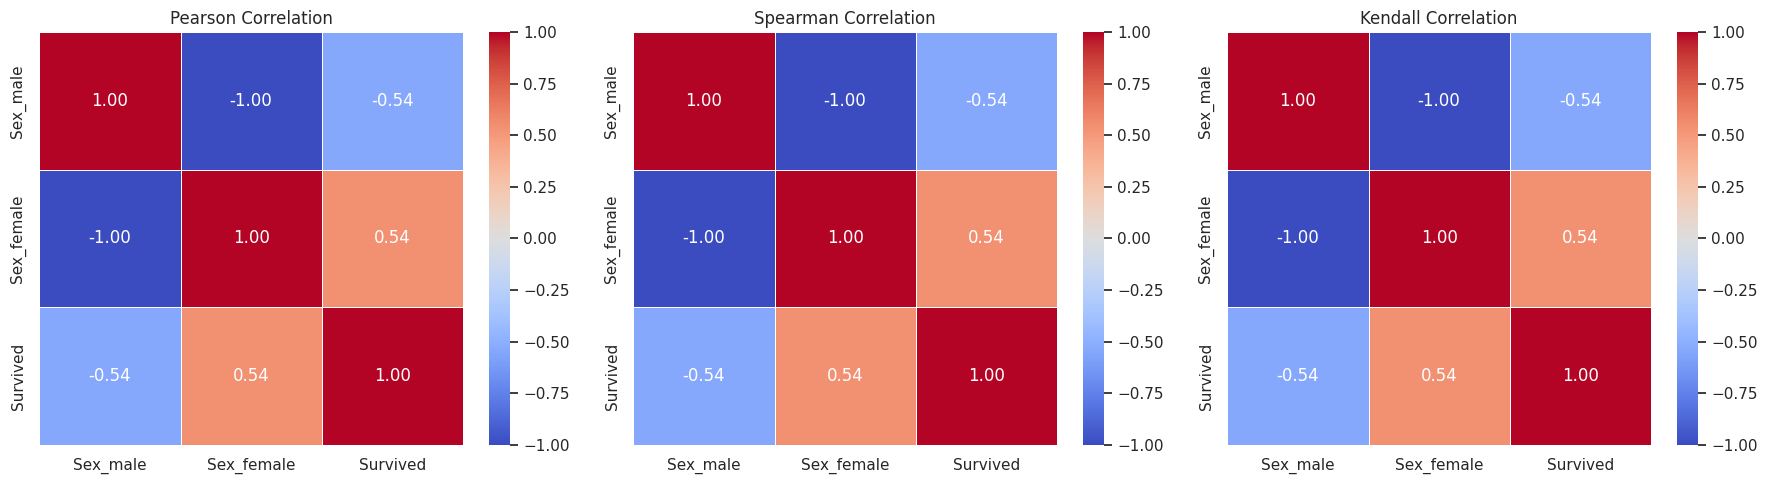

In [53]:
# Select the columns for correlation analysis
cols_for_sex_corr = ['Sex_male', 'Sex_female', 'Survived']

# Calculate correlation matrices using different methods
correlation_matrix_pearson = df_scaled[cols_for_sex_corr].corr(method='pearson')
correlation_matrix_spearman = df_scaled[cols_for_sex_corr].corr(method='spearman')
correlation_matrix_kendall = df_scaled[cols_for_sex_corr].corr(method='kendall')

# Create heatmaps for each correlation method
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pearson Heatmap
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Pearson Correlation')

# Spearman Heatmap
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Spearman Correlation')

# Kendall Heatmap
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[2])
axes[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

We see that all three correlation methods gave the same results.
- Sex_male and Survived: The correlation is -0.54. This indicates a moderately strong negative correlation and it suggests that male passengers had a lower survival rate.
- Sex_female and Survived: The correlation is +0.54. This indicates a moderately strong positive correlation. It suggests that female passengers had a higher survival rate.

Create a countplot to visualize the number of passengers who survived and did not survive, separated by gender, to better see the survival rates for males and females.

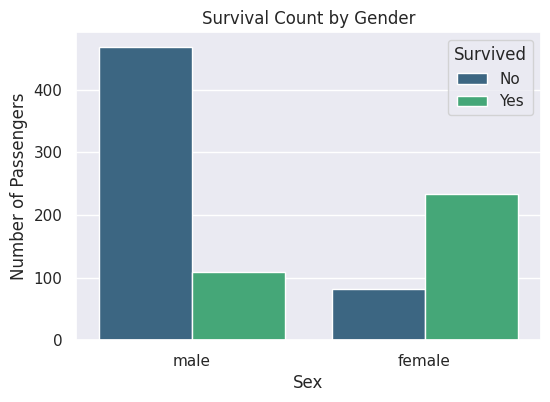

In [54]:
# Temporarily recreate the 'Sex' column for plotting
df['Sex'] = df['Sex_female'].apply(lambda x: 'female' if x == 1 else 'male')

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
# The labels are automatically inferred from the 'Sex' column values ('female', 'male')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Drop the temporary 'Sex' column after plotting
df = df.drop('Sex', axis=1)

#### Correlation between 'Title' and 'Survived'

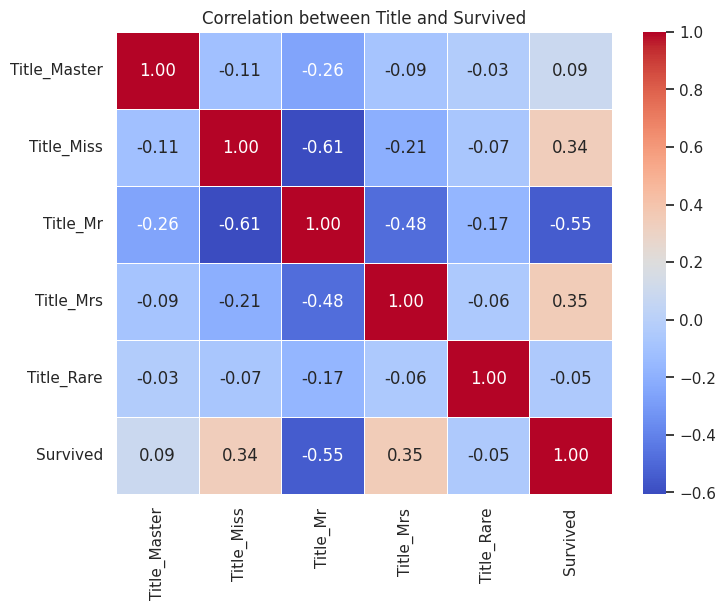

In [55]:
# Select the one-hot encoded Title columns and Survived
title_cols = [col for col in df_scaled.columns if col.startswith('Title_')]
cols_for_title_corr = title_cols + ['Survived']

# Calculate the correlation matrix
correlation_matrix_title = df_scaled[cols_for_title_corr].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_title, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Title and Survived')
plt.show()

From the heatmap we observe that:
- The strogest positive correlation for 'Survived' is represented by the columns 'Title_Mrs' and 'Title_Miss', meaning that the women of high class had more chances of survival
- The strongest negative correlation for 'Survived' is represented by 'Title_Mr', meaning that men had very low chances of survival

#### Correlation between 'Pclass', 'CabinDeck' and 'Survived'

Create a countplot to visualize how many people survived based on their class

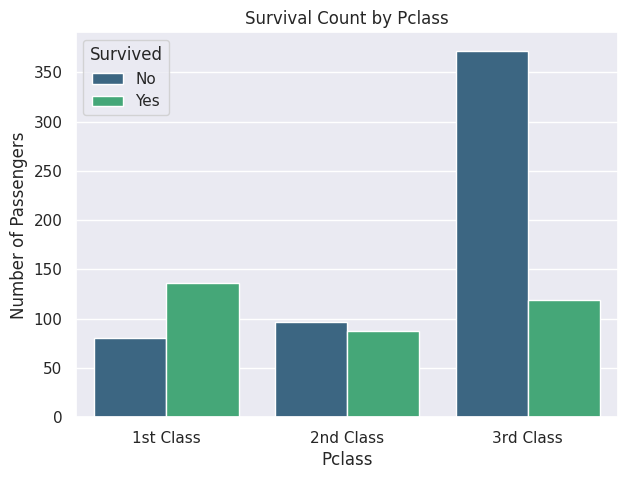

In [59]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class']) # Label Pclass appropriately
plt.show()

- Most people who survived were from 1st class

Create a countplot to visualize the survival count for each cabin deck.

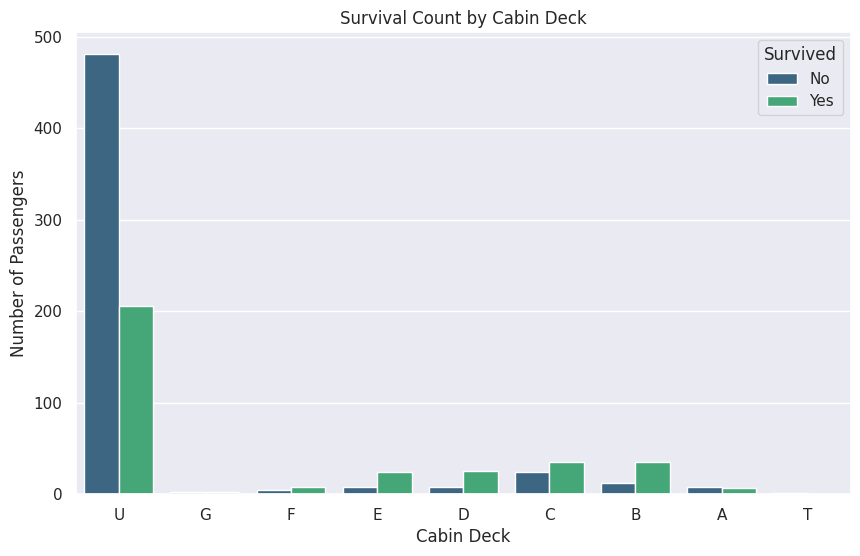

In [61]:
# Get the unique encoded CabinDeck values and their corresponding original deck letters
deck_mapping_inverse = {i: deck for deck, i in deck_mapping.items()}
deck_labels = [deck_mapping_inverse[i] for i in sorted(df['CabinDeck'].unique())]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CabinDeck', hue='Survived', palette='viridis', order=sorted(df['CabinDeck'].unique()))
plt.title('Survival Count by Cabin Deck')
plt.xlabel('Cabin Deck')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(ticks=sorted(df['CabinDeck'].unique()), labels=deck_labels) # Use original deck letters as labels
plt.show()

- From the 2 countplots above we observe that there are more people who didn't survive than people who survived who didn't have a cabin. Also, the people who are assigned a higher and more luxurious cabin had a higher chance of survival than those without any cabins.

#### Correlation between 'FamilySize' and 'IsAlone' with 'Survived'

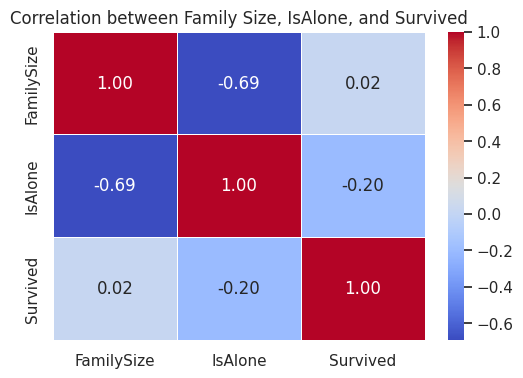

In [62]:
# Select the columns for correlation analysis
cols_for_corr = ['FamilySize', 'IsAlone', 'Survived']

# Calculate the correlation matrix
correlation_matrix = df[cols_for_corr].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Family Size, IsAlone, and Survived')
plt.show()

- We see that there is no strong correlation between 'Survived' and 'FamilySize' or 'IsAlone'

Create two countplots in a single figure to visualize the survival counts based on 'FamilySize' and 'IsAlone'.

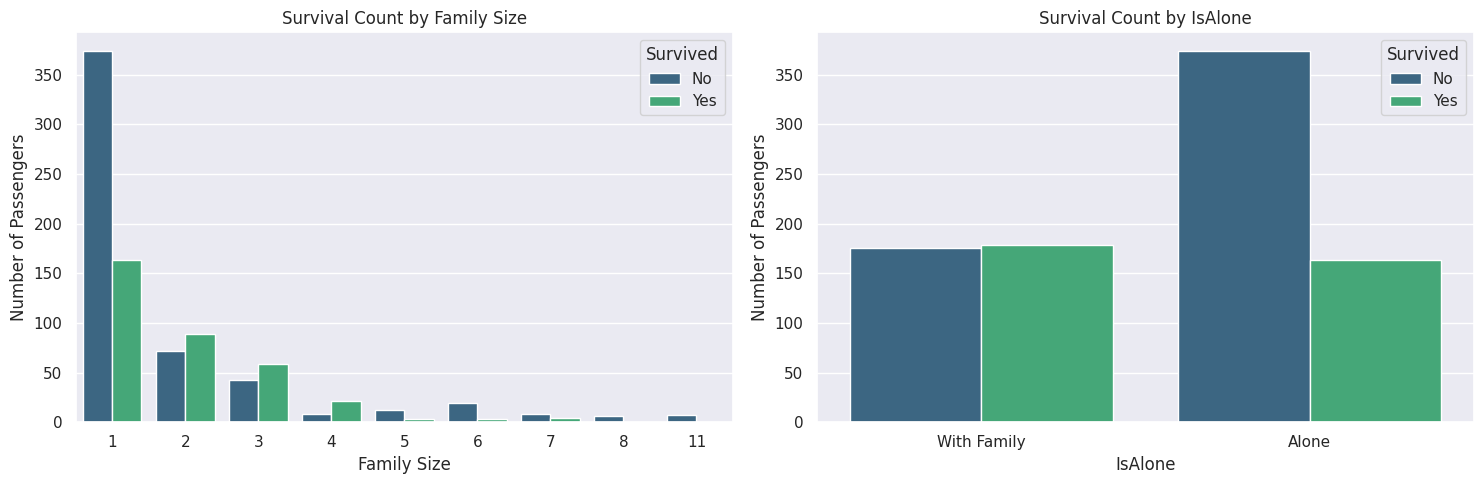

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot for FamilySize and Survived
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='viridis', ax=axes[0])
axes[0].set_title('Survival Count by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Number of Passengers')
axes[0].legend(title='Survived', labels=['No', 'Yes'])


# Countplot for IsAlone and Survived
sns.countplot(data=df, x='IsAlone', hue='Survived', palette='viridis', ax=axes[1])
axes[1].set_title('Survival Count by IsAlone')
axes[1].set_xlabel('IsAlone')
axes[1].set_ylabel('Number of Passengers')
axes[1].set_xticks([0, 1]) # Ensure only 0 and 1 are shown as ticks
axes[1].set_xticklabels(['With Family', 'Alone']) # Label 0 and 1 appropriately
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()

- From the plots we see that the people with 2, 3 or 4 family members were more likely to survive, than those who were alone.

Let's create a countplot to visualize the survival count for each ticket prefix using the column containing the grouped string values. We'll order the prefixes by their frequency.

In [65]:
# Check if the 'TicketPrefix' column with string values exists
if 'TicketPrefix' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='TicketPrefix', hue='Survived', palette='viridis', order=df['TicketPrefix'].value_counts().index)
    plt.title('Survival Count by Ticket Prefix')
    plt.xlabel('Ticket Prefix')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()
else:
    print("The 'TicketPrefix' column with string values was not found in the DataFrame.")
    print("Please ensure the feature engineering step to create this column was executed correctly.")
    # Optionally, add code here to attempt to reconstruct the column from one-hot encoding if needed.

The 'TicketPrefix' column with string values was not found in the DataFrame.
Please ensure the feature engineering step to create this column was executed correctly.


#### Survival counts by 'TicketPrefix'

In [66]:
# Identify the one-hot encoded ticket prefix columns
ticket_prefix_cols = [col for col in df.columns if col.startswith('TicketPrefix_')]

print("Survival Count by Ticket Prefix:")

# Iterate through each one-hot encoded ticket prefix column
for prefix_col in ticket_prefix_cols:
    prefix_name = prefix_col.replace('TicketPrefix_', '')

    # Select rows where this prefix is present (value is 1)
    df_prefix = df[df[prefix_col] == 1]

    # Calculate survival count for this prefix
    survival_counts = df_prefix['Survived'].value_counts().sort_index()

    print(f"\nTicket Prefix: {prefix_name}")
    if not survival_counts.empty:
        print(survival_counts)
    else:
        print("No passengers with this ticket prefix.")

Survival Count by Ticket Prefix:

Ticket Prefix: A
Survived
0    27
1     2
Name: count, dtype: int64

Ticket Prefix: C
Survived
0    3
1    2
Name: count, dtype: int64

Ticket Prefix: CA
Survived
0    27
1    14
Name: count, dtype: int64

Ticket Prefix: FCC
Survived
0    2
1    4
Name: count, dtype: int64

Ticket Prefix: NoPrefix
Survived
0    407
1    254
Name: count, dtype: int64

Ticket Prefix: PC
Survived
0    21
1    39
Name: count, dtype: int64

Ticket Prefix: PP
Survived
0    1
1    2
Name: count, dtype: int64

Ticket Prefix: Rare
Survived
0    18
1    12
Name: count, dtype: int64

Ticket Prefix: SC
Survived
0    8
1    8
Name: count, dtype: int64

Ticket Prefix: SOC
Survived
0    5
1    1
Name: count, dtype: int64

Ticket Prefix: SOP
Survived
0    4
Name: count, dtype: int64

Ticket Prefix: SOTONO
Survived
0    15
1     2
Name: count, dtype: int64

Ticket Prefix: WC
Survived
0    9
1    1
Name: count, dtype: int64

Ticket Prefix: WEP
Survived
0    2
1    1
Name: count, dtype: 

- We notice that the only ticket prefixes of people who had more chances of survival are 'FCC' and 'PC'

### Remove redundant information from the dataset

- Remove the columns: 'Parch', 'SipSp' and 'Name'

In [69]:
df = df.drop(columns=['Parch', 'SibSp', 'Name'], errors='ignore') # Use errors='ignore' in case they were already dropped

print("DataFrame after removing 'Parch' and 'SibSp':")
display(df.head())

DataFrame after removing 'Parch' and 'SibSp':


,PassengerId,Survived,Pclass,Age,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,...,TicketPrefix_NoPrefix,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_Rare,TicketPrefix_SC,TicketPrefix_SOC,TicketPrefix_SOP,TicketPrefix_SOTONO,TicketPrefix_WC,TicketPrefix_WEP
0,1,0,3,22.0,A/5 21171,2.110213,Unknown,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,PC 17599,4.280593,C85,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,1,3,26.0,STON/O2. 3101282,2.188856,Unknown,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,35.0,113803,3.990834,C123,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,373450,2.202765,Unknown,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## 8️⃣ Train-Test Split & Data Leakage Awareness

Split the data into training and test sets.

In [70]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
# Exclude 'PassengerId' and 'Survived'
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original data shape:", df.shape)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Original data shape: (891, 34)
Training features shape: (712, 32)
Testing features shape: (179, 32)
Training target shape: (712,)
Testing target shape: (179,)
